# Demo: LLM Agent with Tavily & LangGraph

This notebook demonstrates the usage of your LangGraph pipeline that integrates:
- ✅ Query parsing (subquery generation)
- ✅ Tavily search via Async API
- ✅ Cohere LLM with streaming response
- ✅ Pretty CLI output

In [45]:
%reload_ext autoreload
%autoreload 2

import nest_asyncio
from agent.langraph_pipeline import TavilyRAGPipeline


## ⚙️ Setup

Make sure the following environment variables are set:

```bash
export COHERE_API_KEY=your_cohere_key
export TAVILY_API_KEY=your_tavily_key
```
and install the required packages:
```bash
pip install -r requirements.txt
```

In [46]:
from dotenv import load_dotenv
load_dotenv()
nest_asyncio.apply()

LangGraph Structure:


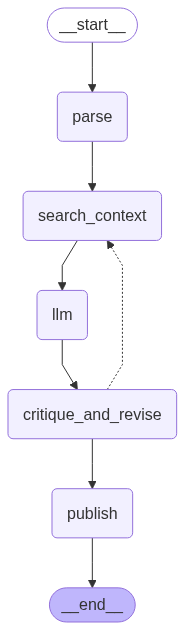

In [47]:
pipeline = TavilyRAGPipeline(show_subqueries=True)
pipeline.visualize()

In [48]:
async def run(queries, debug=False):
    config={"thread_id": 1}
    # To change the memory scope to be per query, uncomment the first line in the loop below.
    for q in queries:
        # rconfig={"thread_id": f"run-{hash(q)}"}
        await pipeline.get_graph().ainvoke({"query": q}, config=config, debug=debug)

In [56]:
# Define categorized test queries
test_cases = {
    "Robustness Queries": [
        "Blargle wib wib ahsheli LangGraph elephant?"
    ],
    "Short Keyword Queries": [
        "LangGraph"
    ]
}

In [57]:
for label, queries in test_cases.items():
    print(f"\n=== Running: {label} ===")
    if label == "Queries for Subquerying":
        debug = True
    else:
        debug = False
    await run(queries, debug=debug)


=== Running: Robustness Queries ===
================================= Human Query ==================================

Blargle wib wib ahsheli LangGraph elephant?

================================== Sub Query ===================================

Blargle wib wib?

================================== Sub Query ===================================

What is LangGraph?

================================== Sub Query ===================================

Do elephants have any special significance?

================================= AI Response ==================================
The response is well-written and captures the connection between LangGraph and
elephants, but it could be improved by incorporating more details from the
sources. Here's a revised version:

An elephant may not be the first thing that
comes to mind when thinking of LangGraph, but just like the majestic elephant,
LangGraph is a powerful force in the AI realm. LangGraph, created by LangChain,
is a framework for building compl